In [14]:
import pandas as pd
from scipy.stats import mannwhitneyu, kruskal
import numpy as np
import os


In [15]:
exp = {'name':'experience', 'df':pd.DataFrame()}
stats = {'name':'statistics', 'df':pd.DataFrame()}
tuning = {'name':'tuning-machine', 'df':pd.DataFrame()}


In [16]:

for folder in os.listdir('.'):
    if not os.path.isdir(folder):
        continue
        
    for file in os.listdir(folder):

        if not file.endswith('.csv'):
            continue

        df = pd.read_csv(f"{folder}/{file}")
        if file.split('_')[-1].startswith('experience'):
            
            exp['df'] = pd.concat([exp['df'], df], axis=0)
        elif file.split('_')[-1].startswith('statistics'):
            stats['df'] = pd.concat([stats['df'], df], axis=0)
        
        elif file.split('_')[-1].startswith('tuning'):
            tuning['df'] = pd.concat([tuning['df'], df], axis=0)



strategy_list = [exp, stats, tuning]

In [21]:
import pandas as pd
from scipy.stats import mannwhitneyu, kruskal
from scipy.stats import shapiro

pd.set_option('display.float_format', '{:.10f}'.format)

strategy_list = [exp, stats, tuning]

columns = pd.MultiIndex.from_tuples([
    ('strategy', ''), 
    ('change', 'mann'), 
    ('change', 'kruskal'), 
    ('fault', 'mann'), 
    ('fault', 'kruskal')
])
df_final = pd.DataFrame(columns=columns)

df_final[('strategy', '')] = [item['name'] for item in strategy_list]

for strategy in strategy_list:
    strategy_name = strategy['name']
    df_data = strategy['df']
    
    all_zeros_rows = df_data[(df_data.iloc[:, 2:12] == 0).all(axis=1)]
    non_zero_rows = df_data[(df_data.iloc[:, 2:12] != 0).any(axis=1)]
    min_length = min(len(all_zeros_rows), len(non_zero_rows))
    for output in ['fault', 'change']:
        if min_length > 0:
            p_mann = mannwhitneyu(
                all_zeros_rows.iloc[:min_length][output], 
                non_zero_rows.iloc[:min_length][output], 
                alternative='less'
            ).pvalue
            
            p_kruskal = kruskal(
                all_zeros_rows.iloc[:min_length][output], 
                non_zero_rows.iloc[:min_length][output]
            ).pvalue
            
            df_final.loc[df_final[('strategy', '')] == strategy_name, (output, 'mann')] = p_mann
            df_final.loc[df_final[('strategy', '')] == strategy_name, (output, 'kruskal')] = p_kruskal
            


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
exp_df = exp['df'] 
stats_df = stats['df']
tuning_df = tuning['df']



A = df[(df.iloc[:, 2:12] == 0).all(axis=1)]
B = df[(df.iloc[:, 2:12] != 0).any(axis=1)]

exp_df['group'] = 'Experience-based'
stats_df['group'] = 'Statistics-based'
tuning_df['group'] = 'Tuning machine'

df1['module'] = 'without_smell'  
df2['module'] = 'with_smell'
df_combined = pd.concat([df1, df2], ignore_index=True)

df_combined['change_log'] = df_combined['change']  # Adding 1 to avoid log(0)
# df_combined['fault_log'] = np.log(df_combined['fault'] + 1)
# plt.subplot(1, 2, 1)
sns.boxplot(data=df_combined, x='change', y='module', palette='Set2')
plt.title('Change Analysis')
plt.xlabel('Change')
# plt.ylabel('Source')

# # Horizontal box plot for 'fault'
# plt.subplot(1, 2, 2)
# sns.boxplot(data=combined, x='fault', y='source', palette='Set3')
# plt.title('Fault Distribution')
# plt.xlabel('Fault')
# plt.ylabel('Source')

# plt.tight_layout()
plt.show()

# plt.figure(figsize=(5, 6))
# sns.boxplot(x='source', y='change_log', data=df_combined)
# plt.title('Box Plot Comparison for col1')

# # Display the plot
# plt.show()

# # Create a boxplot for col2
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='source', y='fault', data=df_combined)
# plt.title('Box Plot Comparison for col2')

# # Display the plot
# plt.show()


NameError: name 'df1' is not defined

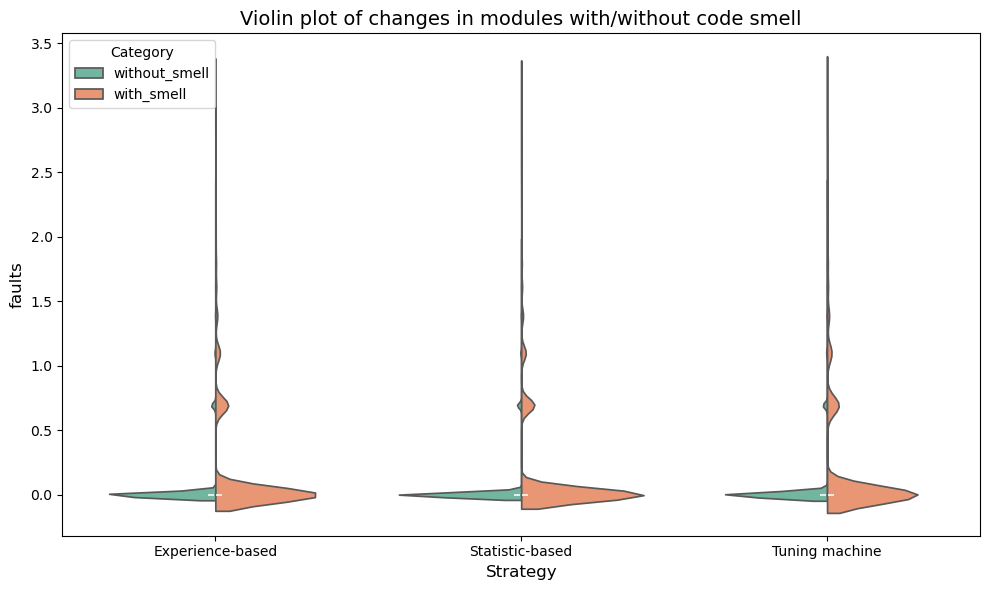

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = exp['df']
df_2 = stats['df']
df_3 = tuning['df']

# Define a function to split DataFrame into A and B groups
def split_groups(df):
    A = df[(df.iloc[:, 2:12] == 0).all(axis=1)]  # All values in cols 2-11 are 0
    B = df[(df.iloc[:, 2:12] != 0).any(axis=1)]
    return np.log(A['fault']+1), np.log(B['fault']+1)

# Split each DataFrame into groups A and B
df1_without_smell, df1_with_smell = split_groups(df_1)
df2_without_smell, df2_with_smell = split_groups(df_2)
df3_without_smell, df3_with_smell = split_groups(df_3)

# Prepare data for plotting
data = {
    'Group': ['Experience-based', 'Experience-based', 'Statistic-based', 'Statistic-based', 'Tuning machine', 'Tuning machine'],
    'Category': ['without_smell', 'with_smell', 'without_smell', 'with_smell', 'without_smell', 'with_smell'],
    'Values': [df1_without_smell.values, df1_with_smell.values, df2_without_smell.values, df2_with_smell.values, df3_without_smell.values, df3_with_smell.values]
}

plot_data = pd.DataFrame(
    [(group, category, value) for group, category, values in zip(data['Group'], data['Category'], data['Values']) for value in values],
    columns=['Group', 'Category', 'Value']
)

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(data=plot_data, x='Group', y='Value', hue='Category', split=True, palette='Set2')

# Customize plot
plt.title('Violin plot of changes in modules with/without code smell', fontsize=14)
plt.xlabel('Strategy', fontsize=12)
plt.ylabel('faults', fontsize=12)
plt.legend(title='Category')
plt.tight_layout()
plt.show()


In [72]:
cols = list(exp['df'].iloc[:, 2:13].columns)
df = exp['df']
cols.remove('LongParameterList')

In [73]:
filtered_df = df[(df['LongParameterList'] == 1) & (df[cols].sum(axis=1)) == 0] 


In [74]:
filtered_df

,tag,file,LongParameterList,LongMethod,LongScopeChaining,LongBaseClassList,LargeClass,LongMessageChain,ComplexLambdaExpression,LongTernaryConditionalExpression,ComplexContainerComprehension,MultiplyNestedContainer,LOC,change,fault,group
0,v1.2.2,lib/ansible/runner/lookup_plugins/__init__.py,0,0,0,0,0,0,0,0,0,0,0,0,0,Experience-based
1,v1.2.2,lib/ansible/callback_plugins/noop.py,1,0,0,0,0,0,0,0,0,0,44,1,0,Experience-based
2,v1.2.2,plugins/inventory/nova.py,0,0,0,0,0,0,0,1,4,0,71,0,0,Experience-based
5,v1.2.2,lib/ansible/runner/lookup_plugins/file.py,0,0,0,0,0,0,0,0,0,0,17,0,0,Experience-based
6,v1.2.2,lib/ansible/callback_plugins/__init__.py,0,0,0,0,0,0,0,0,0,0,0,0,0,Experience-based
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,v4.1.0,tornado/test/websocket_test.py,0,0,0,0,0,0,0,0,0,0,298,3,1,Experience-based
97,v4.1.0,tornado/test/wsgi_test.py,0,0,0,0,0,0,0,0,0,0,72,0,0,Experience-based
98,v4.1.0,maint/test/appengine/common/runtests.py,0,0,0,0,0,0,0,0,0,0,40,0,0,Experience-based
99,v4.1.0,maint/scripts/run_fixers.py,0,0,0,0,0,0,0,0,0,0,3,0,0,Experience-based


In [242]:
df = tuning['df']
X = df.iloc[:, 2:-3] 

for col in X:
    X[f'{col}:LOC'] = X[col] * X['LOC']


In [243]:
import statsmodels.api as sm


y = df['change']  



X = sm.add_constant(X)
model_A = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()
print("Negative Binomial Regression for A:")
print(model_A.summary())
print("="*50)




/home/aryan/anaconda3/envs/dpy/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Negative Binomial Regression for A:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 change   No. Observations:                55860
Model:                            GLM   Df Residuals:                    55837
Model Family:        NegativeBinomial   Df Model:                           22
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -80915.
Date:                Mon, 09 Dec 2024   Deviance:                       64446.
Time:                        14:57:38   Pearson chi2:                 1.04e+05
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3326
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

In [244]:
import statsmodels.api as sm

 
X = sm.add_constant(X)  

y_change = df['change']  
y_fault = df['fault']    

model_change = sm.GLM(y_change, X, family=sm.families.NegativeBinomial()).fit()

model_fault = sm.GLM(y_fault, X, family=sm.families.NegativeBinomial()).fit()

results = []

results.append(('Intercept', model_change.params['const'], model_change.pvalues['const']))
for var in X.columns:
    results.append((var, model_change.params[var], model_change.pvalues[var]))

results.append(('Intercept', model_fault.params['const'], model_fault.pvalues['const']))
for var in X.columns:
    results.append((var, model_fault.params[var], model_fault.pvalues[var]))

# Formatting the results into a LaTeX table
latex_table = """
\\begin{table}[ht]
\\centering
\\begin{tabular}{|l|c|c|c|c|}
\\hline
Variable & Coefficient (Change) & P-value (Change) & Coefficient (Fault) & P-value (Fault) \\\\
\\hline
"""

# Add each row to the table
for row in results:
    latex_table += f"{row[0]} & {row[1]:.4f} & {row[2]:.4f} & {row[1]:.4f} & {row[2]:.4f} \\\\\n"

latex_table += """
\\hline
\\end{tabular}
\\caption{Regression Results for Change and Fault}
\\end{table}
"""

# Print the LaTeX table
print(latex_table)


/home/aryan/anaconda3/envs/dpy/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "



\begin{table}[ht]
\centering
\begin{tabular}{|l|c|c|c|c|}
\hline
Variable & Coefficient (Change) & P-value (Change) & Coefficient (Fault) & P-value (Fault) \\
\hline
Intercept & -0.4118 & 0.0000 & -0.4118 & 0.0000 \\
const & -0.4118 & 0.0000 & -0.4118 & 0.0000 \\
LongParameterList & -0.0085 & 0.3423 & -0.0085 & 0.3423 \\
LongMethod & -0.1232 & 0.0000 & -0.1232 & 0.0000 \\
LongScopeChaining & 0.0604 & 0.7681 & 0.0604 & 0.7681 \\
LongBaseClassList & -0.0135 & 0.7944 & -0.0135 & 0.7944 \\
LargeClass & -0.1841 & 0.0001 & -0.1841 & 0.0001 \\
LongMessageChain & 0.0152 & 0.1376 & 0.0152 & 0.1376 \\
ComplexLambdaExpression & 0.8122 & 0.0000 & 0.8122 & 0.0000 \\
LongTernaryConditionalExpression & 0.9408 & 0.0006 & 0.9408 & 0.0006 \\
ComplexContainerComprehension & 0.4166 & 0.0000 & 0.4166 & 0.0000 \\
MultiplyNestedContainer & 0.0031 & 0.7699 & 0.0031 & 0.7699 \\
LOC & 0.0050 & 0.0000 & 0.0050 & 0.0000 \\
LongParameterList:LOC & -0.0000 & 0.0000 & -0.0000 & 0.0000 \\
LongMethod:LOC & 0.0001 & 0

/home/aryan/anaconda3/envs/dpy/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
